<a href="https://colab.research.google.com/github/emanuel379/Metodos-Nao-Parametricos/blob/main/Parte_2_Resultados_do_experimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ada Maris Pereira Mário - 12725432

Emanuel Victor da Silva Favorato - 12558151

Gabriela dos Santos Amaral - 13749681

Gabriela Scaranello Teixeira de Barros - 9284334

Tayane Leandro Guerrero - 11838203

# Descrição do Experimento

Considere 15 amostras de uma determinada marca de milho de pipoca, com 100 grãos em cada amostra. Divida as amostras em 3 grupos, contendo 5 amostras de 100 grãos cada. Enumere as amostras de 1 a 15 e realize um sorteio aleatório para determinar a ordem do cozimento de cada amostra.

## Ingredientes por Grupo

- **Grupo 1**: Uma colher de sopa de margarina;
- **Grupo 2**: Uma colher de sopa de manteiga;
- **Grupo 3**: Uma colher de sopa de óleo de cozinha.

## Procedimento de Cozimento

1. Coloque o ingrediente correspondente na panela e ligue o fogo baixo (temperatura mínima). Aguarde 1 minuto.
2. Após esse tempo, retire a panela do fogo e adicione o milho. Misture rapidamente para garantir que todos os grãos fiquem engordurados.
3. Espere 30 segundos com a panela fora do fogo.
4. Retorne a panela ao fogo, mexendo ocasionalmente, e mantenha a tampa levemente aberta.
5. Utilize um tempo de cozimento fixo para todas as amostras, garantindo que o máximo de grãos estoure.

## Contagem de Grãos Não Estourados

- Ao final do cozimento de cada amostra, conte o número de grãos que não estouraram de forma satisfatória.
- Lave bem a panela com água fria antes de repetir o experimento com a próxima amostra sorteada.

## Análise de Resultados

1. Monte uma tabela com o número de grãos não estourados em cada amostra, separando os dados por ingrediente (margarina, manteiga e óleo).
2. Utilize uma análise estatística para verificar se há diferença significativa no número médio de grãos que não estouraram entre os grupos.
3. Considere um nível de significância de **α = 5%** para suas conclusões.













In [ ]:
# Experimento

# Dados
Margarina <- c(18, 16, 24, 27, 24)
Manteiga <- c(19, 10, 50, 11, 15)
Oleo <- c(11, 11, 9, 12, 11)

# Criando o nosso data frame
df <- data.frame(
  Margarina = Margarina,
  Manteiga = Manteiga,
  Oleo = Oleo
)

# Definindo o nome das linhas
rownames(df) <- paste("Amostra", 1:nrow(df))

# Visualizando o data frame
print(df)

          Margarina Manteiga Oleo
Amostra 1        18       19   11
Amostra 2        16       10   11
Amostra 3        24       50    9
Amostra 4        27       11   12
Amostra 5        24       15   11


# Visualizando os dados

In [ ]:
install.packages("ggplot2")

library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
# Algumas estatísticas importantes
stat_table <- data.frame(
  Média = colMeans(df),
  Mediana = apply(df, 2, median),
  Desvio_Padrão = apply(df, 2, sd),
  Mínimo = apply(df, 2, min),
  Máximo = apply(df, 2, max),
  Intervalo = apply(df, 2, max) - apply(df, 2, min)
)

print(stat_table)

          Média Mediana Desvio_Padrão Mínimo Máximo Intervalo
Margarina  21.8      24      4.604346     16     27        11
Manteiga   21.0      15     16.598193     10     50        40
Oleo       10.8      11      1.095445      9     12         3


In [ ]:
# Manipulando data frame para a visualização dos dados e execução do teste
df_long <- stack(df)
colnames(df_long) <- c("values", "groups")

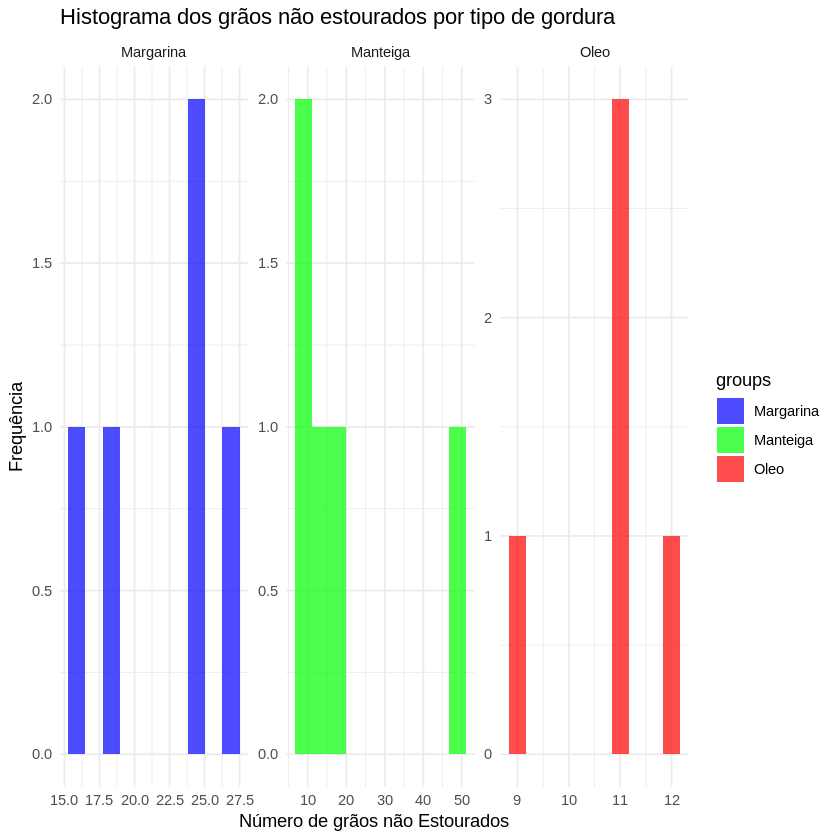

In [ ]:
# Histogramas
ggplot(df_long, aes(x = values, fill = groups)) +
  geom_histogram(bins = 10, alpha = 0.7, position = "dodge") +
  facet_wrap(~ groups, scales = "free") +
  labs(title = "Histograma dos grãos não estourados por tipo de gordura",
       x = "Número de grãos não Estourados",
       y = "Frequência") +
  theme_minimal() +
  scale_fill_manual(values = c("Margarina" = "blue", "Manteiga" = "green", "Oleo" = "red"))

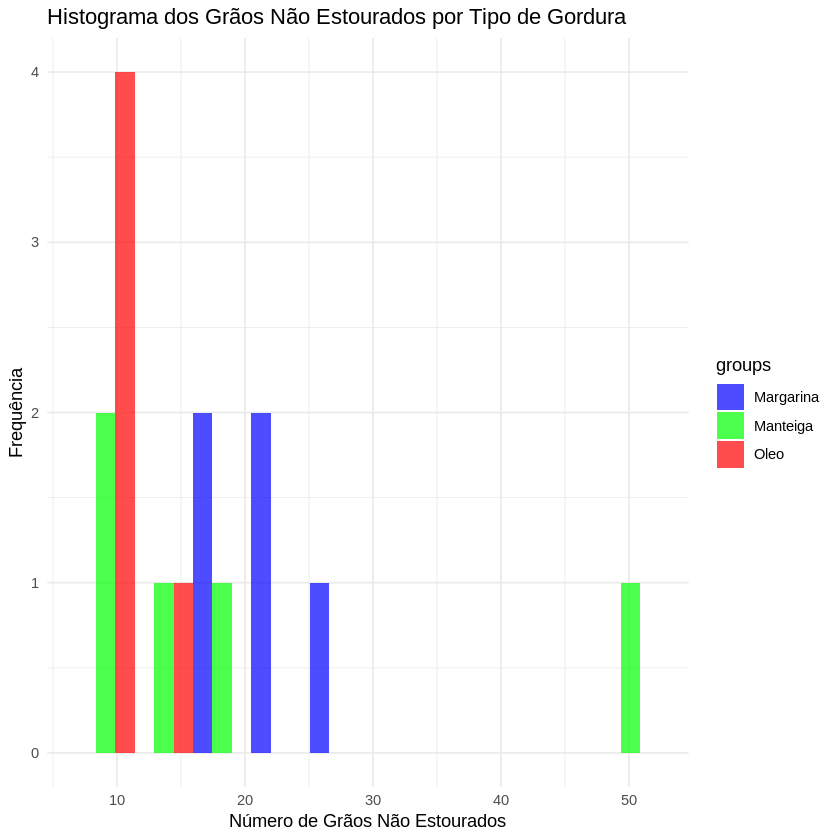

In [ ]:
# Histograma para os três grupos no mesmo gráfico
ggplot(df_long, aes(x = values, fill = groups)) +
  geom_histogram(bins = 10, alpha = 0.7, position = "dodge") +
  labs(title = "Histograma dos Grãos Não Estourados por Tipo de Gordura",
       x = "Número de Grãos Não Estourados",
       y = "Frequência") +
  theme_minimal() +
  scale_fill_manual(values = c("Margarina" = "blue", "Manteiga" = "green", "Oleo" = "red"))


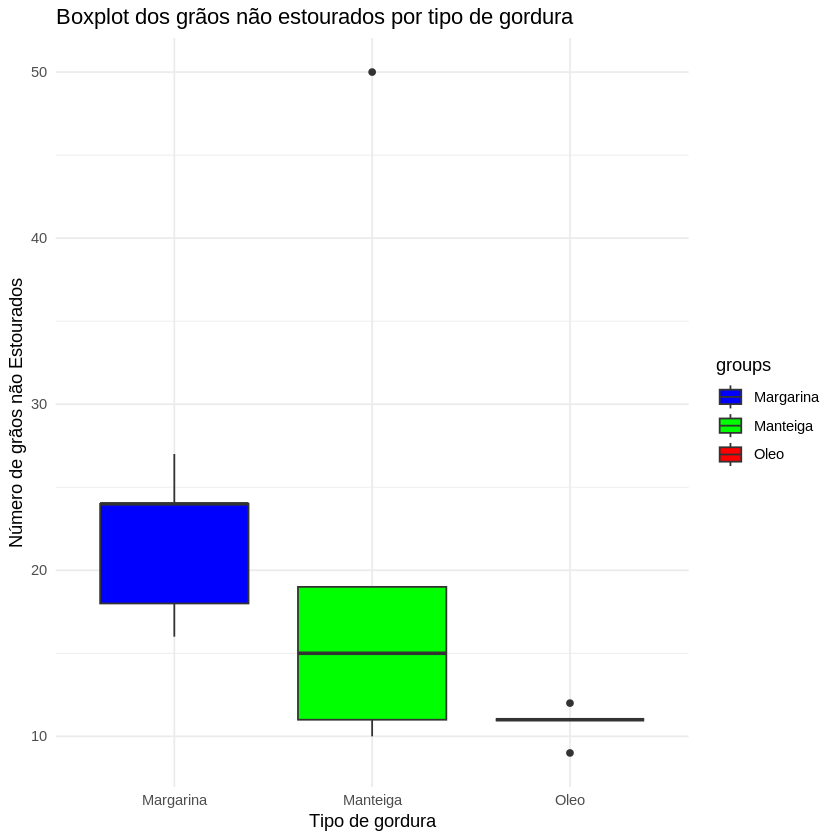

In [ ]:
# Boxplot
ggplot(df_long, aes(x = groups, y = values, fill = groups)) +
  geom_boxplot() +
  labs(title = "Boxplot dos grãos não estourados por tipo de gordura",
       x = "Tipo de gordura",
       y = "Número de grãos não Estourados") +
  theme_minimal() +
  scale_fill_manual(values = c("Margarina" = "blue", "Manteiga" = "green", "Oleo" = "red"))

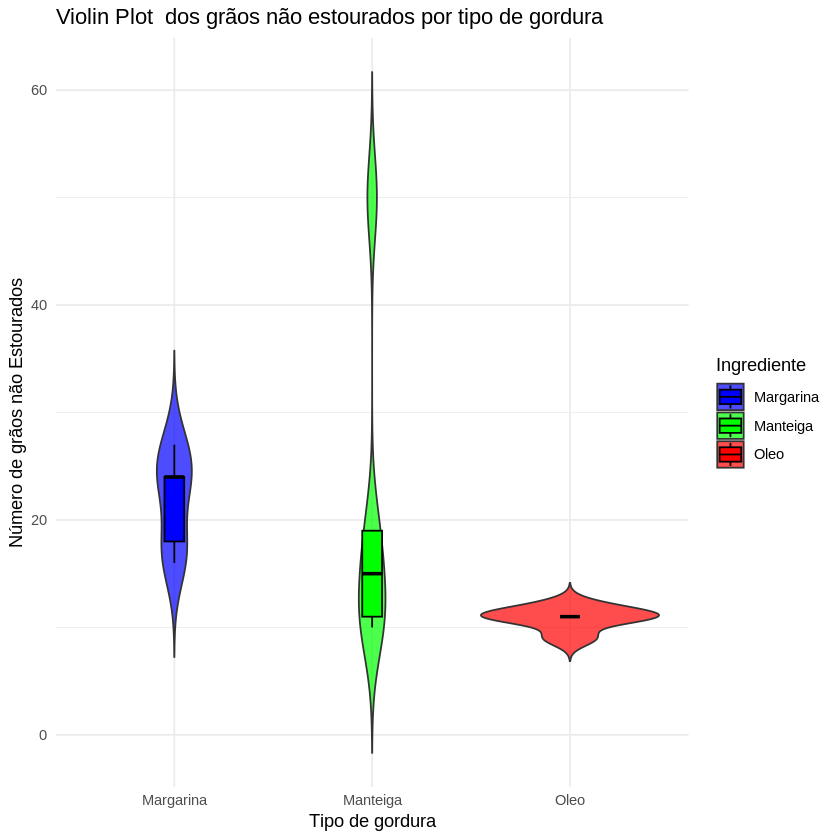

In [13]:
# Transformar os dados para formato longo
df_long <- stack(df)
colnames(df_long) <- c("Valores", "Ingrediente")

# Criar o Violin Plot
ggplot(df_long, aes(x = Ingrediente, y = Valores, fill = Ingrediente)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  geom_boxplot(width = 0.1, position = position_dodge(0.9), color = "black", outlier.shape = NA) +
  labs(title = "Violin Plot  dos grãos não estourados por tipo de gordura",
       x = "Tipo de gordura",
       y = "Número de grãos não Estourados") +
  theme_minimal() +
  scale_fill_manual(values = c("Margarina" = "blue", "Manteiga" = "green", "Oleo" = "red"))

A visualização dos dados nos permite observar a existência de dados bastante discrepantes, com pouca ou nenhuma intersecção entre os boxplots e ditribuições nada semelhantes nos histogramas e violin plot. Tal variabilidade acaba por dificultar a comparação entre os grupos, não inviabilizando-a, entretanto.

          Ingrediente Média Desvio_Padrão        CV
Margarina   Margarina  21.8      4.604346 0.2112085
Manteiga     Manteiga  21.0     16.598193 0.7903901
Oleo             Oleo  10.8      1.095445 0.1014301


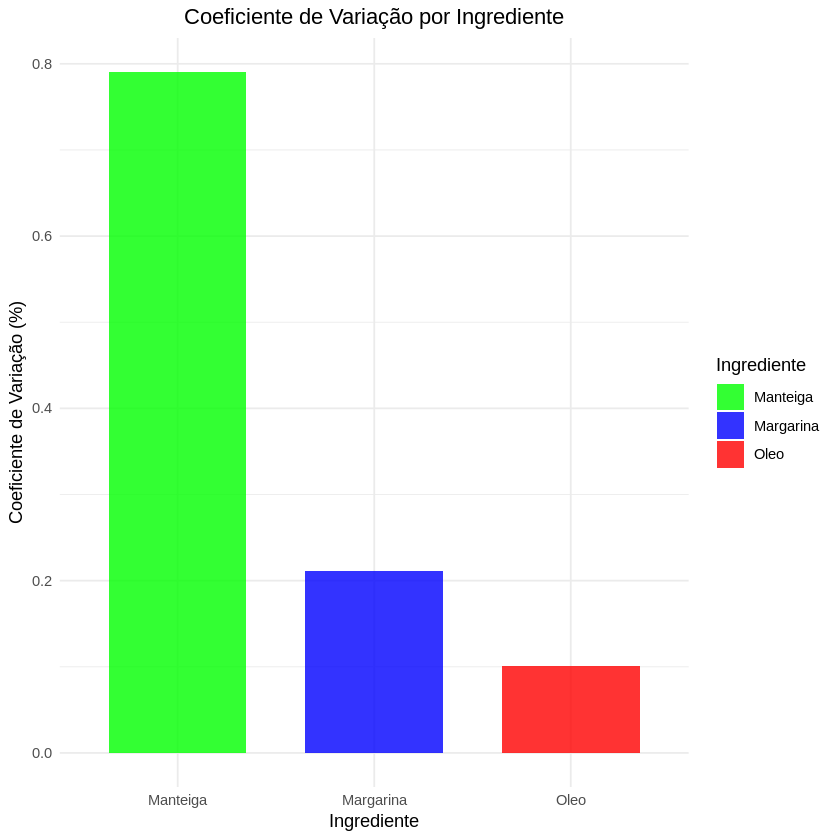

In [18]:
# Calculando o coeficiente de variação (CV)
variancia_relativa <- data.frame(
  Ingrediente = colnames(df),
  Média = colMeans(df),
  Desvio_Padrão = apply(df, 2, sd),
  CV = (apply(df, 2, sd) / colMeans(df))
)

print(variancia_relativa)

ggplot(variancia_relativa, aes(x = Ingrediente, y = CV, fill = Ingrediente)) +
  geom_bar(stat = "identity", width = 0.7, alpha = 0.8) +
  labs(
    title = "Coeficiente de Variação por Ingrediente",
    x = "Ingrediente",
    y = "Coeficiente de Variação (%)"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("Margarina" = "blue", "Manteiga" = "green", "Oleo" = "red")) +
  theme(plot.title = element_text(hjust = 0.5))

O coeficiente de variação nos traz algumas informações importantes acerca dos dados, tais como:


   - O coeficiente de variação elevado para a manteiga reflete a superdispersão dos dados, o que implica observações bastante inconsistentes, com valores extremos influenciando fortemente o todo.

   - Com um CV de 21.12%, a margarina apresenta uma dispersão moderada. Esse valor indica uma variabilidade relativa maior do que o óleo, mas ainda bem menor que a manteiga.

   - O menor coeficiente de variação destaca a alta consistência dos resultados para o óleo, em comparação aos demais grupos. Essa baixa variabilidade sugere certa uniformidade no número de grãos não estourados.

# Hipóteses do Teste

$H0:$ O número de grãos que não estouraram é igual para os três grupos.  

$H1:$ Pelo menos um dos grupos difere dos demais.


In [ ]:
# Ranks calculados a mão
rank_margarina <- c(10, 9, 12.5, 14, 12.5)
rank_manteiga <- c(11, 2, 15, 4.5, 8)
rank_oleo <- c(4.5, 4.5, 1, 7, 4.5)

# Calculando os ranks
ranks <- data.frame(
  Margarina = rank_margarina,
  Manteiga = rank_manteiga,
  Oleo = rank_oleo
)

# Definindo o nome das linhas
rownames(ranks) <- paste("Amostra", 1:nrow(ranks))

# Exibindo a tabela de ranks
print(ranks)

          Margarina Manteiga Oleo
Amostra 1      10.0     11.0  4.5
Amostra 2       9.0      2.0  4.5
Amostra 3      12.5     15.0  1.0
Amostra 4      14.0      4.5  7.0
Amostra 5      12.5      8.0  4.5


In [ ]:
# Apresentando os resultados do Teste Kruskal-Wallis
teste_KW <- kruskal.test(values ~ groups, data = df_long)
teste_KW


	Kruskal-Wallis rank sum test

data:  values by groups
Kruskal-Wallis chi-squared = 6.7985, df = 2, p-value = 0.0334


Como $valor-p < α$, rejeitamos $H0$.

**Conclusão:** ao nível de significância α = 5%, os dados nos fornecem evidências de que pelo menos um dos grupos difere dos demais, no que tange ao número de grãos que não estouraram.

# Comparações múltiplas

In [ ]:
# Variáveis para comparações múltiplas
dados <- df_long$values
groups <- df_long$groups
nA <- length(Margarina)
nB <- length(Manteiga)
nC <- length(Oleo)
n <- nA + nB + nC
k <- 3  # Número de grupos (Margarina, Manteiga, Oleo)

# Rank dos dados
ri <- rank(dados)

# Somatórios das classificações (R)
Ri <- c(sum(ri[1:nA]), sum(ri[(nA+1):(nA+nB)]), sum(ri[(nA+nB+1):(nA+nB+nC)]))

# Variância ajustada S2
S2 <- (1/(n-1)) * (sum(ri^2) - (n * ((n + 1)^2) / 4))

# Graus de liberdade e valor crítico t
nu <- n - k
alpha <- 0.05
t_2 <- qt(1 - alpha/2, nu)

# Cálculo de Vc
Vc <- t_2 * sqrt((S2 * (n - 1 - teste_KW$statistic) / (n - k)))

# Comparações múltiplas - Comparação de pares
comparacao_1_2 <- ifelse(abs(Ri[1]/nA - Ri[2]/nB) > Vc * sqrt(1/nA + 1/nB), 'Diferentes', 'Não Diferentes')
comparacao_1_3 <- ifelse(abs(Ri[1]/nA - Ri[3]/nC) > Vc * sqrt(1/nA + 1/nC), 'Diferentes', 'Não Diferentes')
comparacao_2_3 <- ifelse(abs(Ri[2]/nB - Ri[3]/nC) > Vc * sqrt(1/nB + 1/nC), 'Diferentes', 'Não Diferentes')

# Resultados das comparações
print(paste("Comparação Margarina vs Manteiga: ", comparacao_1_2))
print(paste("Comparação Margarina vs Óleo: ", comparacao_1_3))
print(paste("Comparação Manteiga vs Óleo: ", comparacao_2_3))

[1] "Comparação Margarina vs Manteiga:  Não Diferentes"
[1] "Comparação Margarina vs Óleo:  Diferentes"
[1] "Comparação Manteiga vs Óleo:  Não Diferentes"


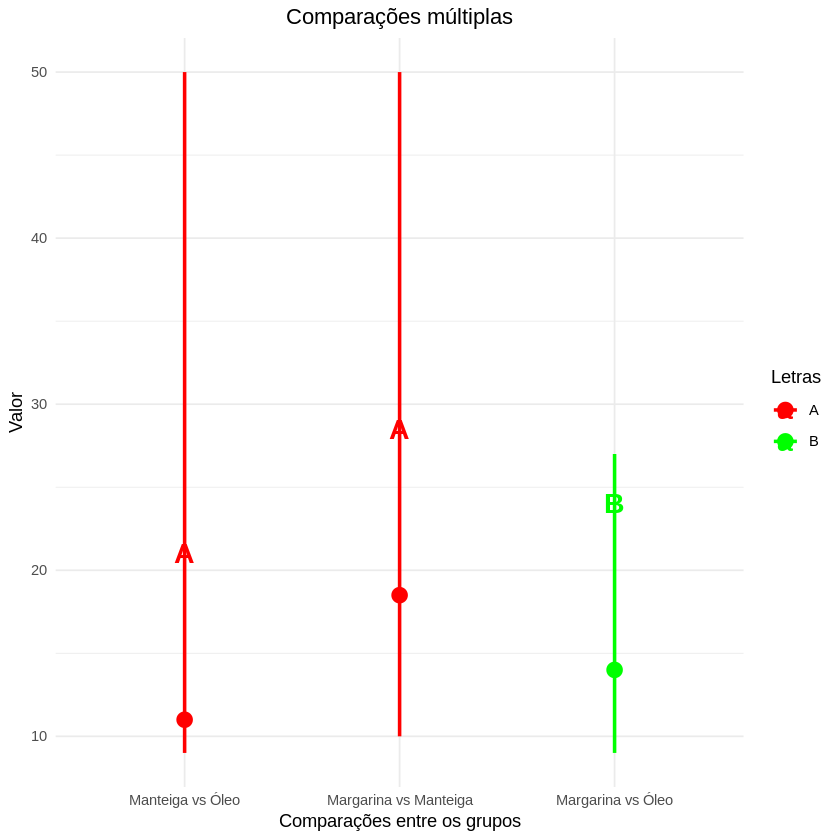

In [ ]:
# Dados das comparações
comparacoes <- c("Margarina vs Manteiga", "Margarina vs Óleo", "Manteiga vs Óleo")
resultados_comparacoes <- c(comparacao_1_2, comparacao_1_3, comparacao_2_3)

# Atribuindo letras com base nos resultados
letras <- ifelse(resultados_comparacoes == 'Diferentes', c('A', 'B', 'C'), c('A', 'A', 'A'))

# Calculando os valores mínimo e máximo para cada par de grupos comparados
min_values <- c(min(Margarina, Manteiga), min(Margarina, Oleo), min(Manteiga, Oleo))
max_values <- c(max(Margarina, Manteiga), max(Margarina, Oleo), max(Manteiga, Oleo))

# Calculando a mediana para cada par de grupos combinados
median_values <- c(median(c(Margarina, Manteiga)), median(c(Margarina, Oleo)), median(c(Manteiga, Oleo)))

# Criando o data frame para o gráfico
df_comparacoes <- data.frame(
  Comparacao = comparacoes,
  Resultado = resultados_comparacoes,
  Letras = letras,
  Min = min_values,
  Max = max_values,
  Median = median_values
)

# Definindo cores para as letras
cor_letras <- c("A" = "red", "B" = "green", "C" = "blue")

# Gráfico com linha conectando o mínimo, máximo e os pontos representando as medianas
ggplot(df_comparacoes, aes(x = Comparacao, y = Median, color = Letras)) +
  geom_point(size = 4) +  # Ponto da mediana
  geom_segment(aes(x = Comparacao, xend = Comparacao, y = Min, yend = Max), linetype = "solid", size = 1) +  # Linha do intervalo
  geom_text(aes(label = Letras, y = Median + 10, color = Letras), size = 6, fontface = "bold") +  # Letras acima dos pontos, mesma cor
  scale_color_manual(values = cor_letras) +
  labs(title = "Comparações múltiplas",
       x = "Comparações entre os grupos",
       y = "Valor") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  # Centraliza o título

É possível observar que o par Margarina e Manteiga é o que discorda dos demais.